
# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment, you will be able to:


* understand Bias and Variance    
* know how does the degree of the polynomial affect the bias and variance

In [ ]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="500" height="300" controls>
  <source src="https://cdn.talentsprint.com/aiml/AIML_BATCH_HYD_7/23FEB/module_2_week_8_experment_3.mp4" type="video/mp4">
</video>
""")

## Dataset

### Description

In this experiment, we have chosen sine curve real data.  As the real-world is never perfectly clean however, we add noise to the curve to show that the real-world data is noisy. This is done by adding a small random number to each value. 


## AI /ML Technique

In this experiment, we use the sine curve to understand how the change in bias and variance affects the degree of a polynomial.


### Bias and Variance:

The **bias** is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting). 

The **variance** is an error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting). The below image shows how the overfitting and underfitting looks.

![alt text](https://cdn.talentsprint.com/aiml/Experiment_related_data/IMAGES/Overfitting.png)




You can use any polynomial of higher order to project the idea of bias and variance. However, the sine values suit our experiment better because it is a curve that is complex enough not to fit with simple linear or quadratic equations (to show bias) however it will overfit our data with higher-order polynomials (6th order).

We want to try and capture the data using a polynomial function. A polynomial is defined by the degree or the highest power for the x-values. A line has a degree of 1 because it is of the form $y = m_1*x + c$ where $m$ is the slope and $c$ is the intercept. A third-degree polynomial would have the form $y = m_3 * x^3 + m_2 * x^2 + m_1* x + c$ and so on. The higher the degree of the polynomial, the more flexible the model.


We use fit_poly() to create a polynomial function with the specified number of degrees and plots the results. We can use these results to determine the optimal degrees to achieve the right balance between overfitting and underfitting. 


In this experiment, we will try : 
* To observe how the model changes with changing degrees.
* To estimate the errors.

### Setup Steps

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}


In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook  

from IPython import get_ipython
ipython = get_ipython()
  
notebook="U3W14_27_Polynomial_Fitting_A" #name of the notebook
def setup():
#  ipython.magic("sx pip3 install torch")  
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return


def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing the required packages

In [4]:
import numpy as np
import pandas as pd

# Scikit-Learn for fitting models
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# For plotting 
import matplotlib
import matplotlib.pyplot as plt

### Generating the Data

We define a curve, in this case, a sine curve to serve as our process that generates the data. As the real-world is never perfectly clean however, we also need to add some noise into the observations. This is done by adding a small random number to each value.

In [5]:
# Set the random seed for reproducible results
np.random.seed(42)
 
# Generating function representing a process in real life
def true_gen(x):
    y = np.sin(1.2 * x * np.pi) 
    return(y)

# x values and y value with a small amount of random noise
x = np.sort(np.random.rand(120))
y = true_gen(x) + 0.1 * np.random.randn(len(x)) # Basically for each value of pure sin(x), we are adding a small random value 

### Training and Testing

The np.random.choice() method returns a randomly selected element from the specified sequence.

In [7]:
# Random indices for creating training and testing sets
random_ind = np.random.choice(list(range(120)), size = 120, replace=False)
x_t = x[random_ind] # For the elements in the array x, random elements are chosen based on the index deterimined by random_ind
y_t = y[random_ind]

# Training and testing observations
train = x_t[:int(0.7 * len(x))] # We are now choosing 70% of data as training and the remaining below as test.
test = x_t[int(0.7 * len(x)):]

y_train = y_t[:int(0.7 * len(y))]
y_test = y_t[int(0.7 * len(y)):]

# Model the true curve. As you might have noticed, here too we are calling the true_gen method. But here the difference is..
# ...the input is a continuous values of x (determined by np.linspace, which gives uniformly spaced values) for that we are getting
# ..the sin(x) value, and thus fit_poly(train, y_train, test, y_test, degrees = 1, plot='test')this time plotting the sine curve itself. (above we just created 'points' following sine curve)
x_linspace = np.linspace(0, 1, 1000)
y_true = true_gen(x_linspace)

### Visualization

In [ ]:
# YOUR CODE HERE : 1. Plot train data vs train labels
#                  2. Plot test data vs test labels
#                  3. Plot x_linspace vs y_true

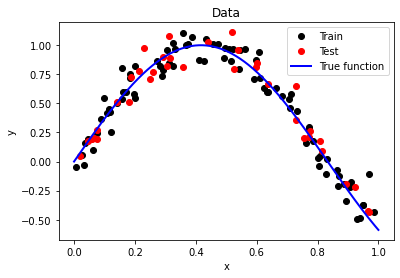

In [8]:
plt.plot(train, y_train, 'ko', label = 'Train'); 
plt.plot(test, y_test, 'ro', label = 'Test')
plt.plot(x_linspace, y_true, 'b-', linewidth = 2, label = 'True function')
plt.legend()
plt.xlabel('x'); plt.ylabel('y'); plt.title('Data');

### Polynomial Model

We want to try and capture the data using a polynomial function. A polynomial is defined by the degree or the highest power for the x-values. A line has a degree of 1 because it is of the form $y = m_1*x + c$ where $m$ is the slope and $c$ is the intercept. A third-degree polynomial would have the form $y = m_3 * x^3 + m_2 * x^2 + m_1* x + c$ and so on. The higher the degree of the polynomial, the more flexible the model.

The following function creates a polynomial with the specified number of degrees and plots the results. We can use these results to determine the optimal degrees to achieve the right balance between over and underfitting.

In [13]:
def fit_poly(train, y_train, test, y_test, degrees, plot='train', return_scores=False):
    
    features = PolynomialFeatures(degree=degrees, include_bias=False) # YOUR CODE HERE : Create a polynomial transformation of features.For example for degree 2, (x,x**2) i.e. 2,2**2 => (2,4)
    # so a point in 1-D is converted to a point in 2-D, and so on for even higher degree. 
    # Hint : Use 'PolynomialFeatures' from scikit-learn
    
    # Reshape training features for use in scikit-learn and transform features
    train = train.reshape((-1, 1))
    train_trans = features.fit_transform(train)
    
    model = LinearRegression() # YOUR CODE HERE: Create a 'linear regression' model (from SkLearn) and train the model using train_trans and y_train values.
    

    model.fit(train_trans, y_train) 

    # Predicting on train data
    train_predictions = model.predict(train_trans)
    
    training_error = mean_squared_error(y_train, train_predictions) # YOUR CODE HERE : Calculate the Mean squared error on training set
    
    # Reshape test features for use in scikit-learn and transform features
    test = test.reshape(-1, 1)
    test_trans = features.fit_transform(test)
 
    test_predictions = model.predict(test_trans) # YOUR CODE HERE: Predict the labels of test data
    testing_error = mean_squared_error(y_test, test_predictions) # YOUR CODE HERE : Calculate the mean squared error on testing set
    
    # Find the model curve and the true curve
    x_curve = np.linspace(0, 1, 100)
    x_curve = x_curve.reshape(-1, 1)
    x_curve_trans = features.fit_transform(x_curve)
    
    model_curve =  model.predict(x_curve_trans) # YOUR CODE HERE : Calculate model curve by predicting the values of 'x_curve_trans'
    y_true_curve = true_gen(x_curve[:, 0]) # YOUR CODE HERE : Calculate true curve for x_curve values using 'true_gen' function defined above.
  
    if plot == 'train':

      
      # YOUR CODE HERE : Plot observations, true function and model predicted function

        plt.plot(train[:, 0], y_train, 'ko', label = 'Observations')
        plt.plot(x_curve[:, 0], y_true_curve, linewidth = 4, label = 'True Function')
        plt.plot(x_curve[:, 0], model_curve, linewidth = 4, label = 'Model Function')
        plt.xlabel('x'); plt.ylabel('y')
        plt.legend()
        plt.ylim(-1, 1.5); plt.xlim(0, 1)
        plt.title('{} Degree Model on Training Data'.format(degrees))
        plt.show()
       
    elif plot == 'test':
        
        # YOUR CODE HERE : Plot the observations, predictions and True Function

        plt.plot(test, y_test, 'o', label = 'Test Observations')
        plt.plot(x_curve[:, 0], y_true_curve, 'b-', linewidth = 2, label = 'True Function')
        plt.plot(test, test_predictions, 'ro', label = 'Test Predictions')
        plt.ylim(-1, 1.5); plt.xlim(0, 1)
        plt.legend(), plt.xlabel('x'), plt.ylabel('y'); plt.title('{} Degree Model on Testing Data'.format(degrees)), plt.show();
    
       
     # Return the metrics
    if return_scores:
        return training_error, testing_error


### Fitting Model with Different Degrees

**Degrees = 1 -> Underfitting**

For example, a degree-1 polynomial fits a straight line to the data. In this case, a linear model cannot accurately learn the relationship between x and y so it will underfit the data. This is because an underfit model has low variance and high bias. Variance refers to how much the model is dependent on the training data.

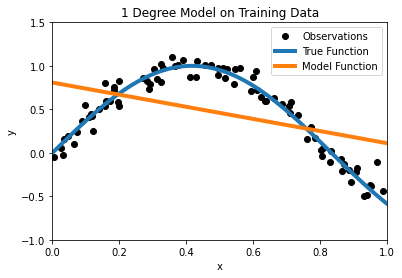

In [14]:
fit_poly(train, y_train, test, y_test, degrees = 1, plot='train')

 The model predictions for the testing data are shown compared to the true function and testing data points

In [ ]:
fit_poly(train, y_train, test, y_test, degrees = 1, plot='test')

**Degrees = 25 -> Overfitting**
 An overfit model will have extremely low training error but a high testing error.

We can go in the completely opposite direction and create a model that overfits the data. This model has too much flexibility and learns the training data too closely. As the training data has some amount of noise, it will end up capturing that noise and will be misled by that noise when it tries to make predictions on the test data.

This is a model with high variance because it will change significantly depending on the training data.

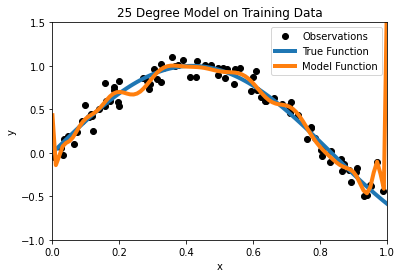

In [16]:
fit_poly(train, y_train, test, y_test, degrees = 25, plot='train')

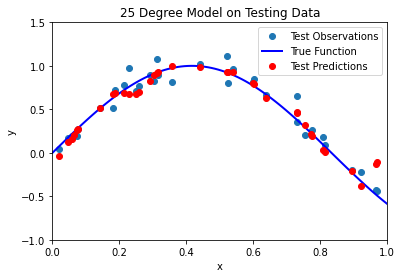

In [17]:
fit_poly(train, y_train, test, y_test, degrees = 25, plot='test')

**Degrees = 5 -> Balanced Model**

Now that we have seen the two extremes, we can take a look at a model that does a good job of both accounting for the data while not following it too closely.


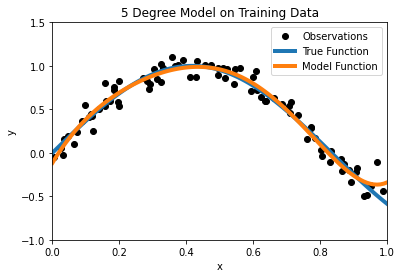

In [18]:
fit_poly(train, y_train, test, y_test, degrees = 5, plot='train')

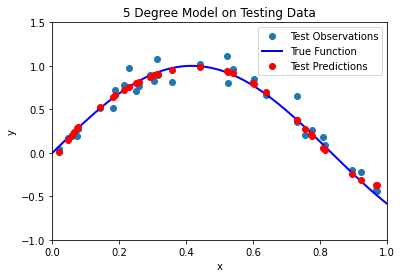

In [19]:
fit_poly(train, y_train, test, y_test, degrees = 5, plot='test')

In [20]:
# Range of model degrees to evaluate
degrees = [int(x) for x in np.linspace(1, 40, 40)]

# Store the results of a dataframe
results = pd.DataFrame(0, columns = ['train_error', 'test_error'], index = degrees)

# Try each value of degrees for the model and record results
for degree in degrees:
    degree_results = fit_poly(train, y_train, test, y_test, degree, plot=False, return_scores=True)
    results.loc[degree, 'train_error'] = degree_results[0]
    results.loc[degree, 'test_error'] = degree_results[1]

### Evaluate Models

We will use a range of values to see how the performance on the training and testing set compares. A model with much lower errors on the training data than the testing data is overfit. A model with high error on the training data (which will lead to high testing error as well) is underfitting because it does not even learn the training data.

In [21]:
print('Training Errors\n')
train_eval = results.sort_values('train_error').reset_index(level=0).rename(columns={'index': 'degrees'})
train_eval.loc[:,['degrees', 'train_error']] .head(10)

Training Errors



,degrees,train_error
0,39,0.006129
1,31,0.006155
2,36,0.006159
3,35,0.006166
4,32,0.006167
5,33,0.006169
6,34,0.006169
7,37,0.006197
8,38,0.006202
9,40,0.006238


In [22]:
print('Testing Errors\n')
train_eval = results.sort_values('test_error').reset_index(level=0).rename(columns={'index': 'degrees'})
train_eval.loc[:,['degrees', 'test_error']] .head(10)

Testing Errors



,degrees,test_error
0,4,0.009053
1,6,0.009111
2,8,0.009147
3,5,0.009175
4,7,0.009177
5,11,0.009338
6,9,0.009409
7,10,0.009415
8,3,0.009617
9,12,0.010056


In [23]:
# Your Code : Plot a graph results.index vs training and testing errors.

print('\nMinimum Training Error occurs at {} degrees.'.format((results['train_error'].idxmin())))
print('Minimum Testing Error occurs at {} degrees.\n'.format((results['test_error'].idxmin())))


Minimum Training Error occurs at 39 degrees.
Minimum Testing Error occurs at 4 degrees.



### Please answer the questions below to complete the experiment:




In [28]:
#@title For a 1-D point x=3, is the higher order feature of degree 3 result (2,4,8)? (Refer SkLearn's "PolynomialFeatures" method to answer this){ run: "auto", form-width: "500px", display-mode: "form" }
Answer= "FALSE" #@param ["","TRUE","FALSE"]


In [30]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [33]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "nnn" #@param {type:"string"}


In [34]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [35]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [36]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [37]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [38]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 11675
Date of submission:  18 Dec 2020
Time of submission:  11:22:13
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
